
Reads in the file task_timings.log and calculates the total time taken to run 
the tasks. Visualizes the data in a bar chart.


/Users/bea/anaconda3/envs/hsol_py310/lib/python3.10/site-packages/seaborn/_statistics.py:31: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 1.23.0)
  from scipy.stats import gaussian_kde


/Users/bea/Documents/GitHub/SAPPHIRE_forecast_tools/apps/pipeline/src
/Users/bea/Documents/GitHub/sensitive_data_forecast_tools/intermediate_data/task_timings_ZH.log
Task Timing Summary:
                                  Task  Duration   Status
0  PreprocessingGatewayQuantileMapping     72.55  Success
1                      ConceptualModel     60.68   Failed
2            RunMLModel_TSMIXER_PENTAD    135.58   Failed
3                RunMLModel_TFT_PENTAD      0.46   Failed
4             RunMLModel_TSMIXER_DECAD      0.46   Failed

Task Statistics:
                                   Task  Min (s)  Max (s)    Mean (s)  \
0                       ConceptualModel    60.68  1278.12  667.085714   
6                   PreprocessingRunoff   186.70   196.97  190.283333   
11                RunMLModel_TIDE_DECAD     0.52   539.95  111.503158   
9                  RunMLModel_TFT_DECAD     0.45   428.11  107.237895   
4               PostProcessingForecasts    62.85    69.16   65.764286   
5   Prepr

/var/folders/fx/fhbs7qgd6998fvtd5n8bs1lr0000gn/T/ipykernel_32823/307296186.py:79: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Duration', y='Task', data=df, ci=None, palette='viridis')


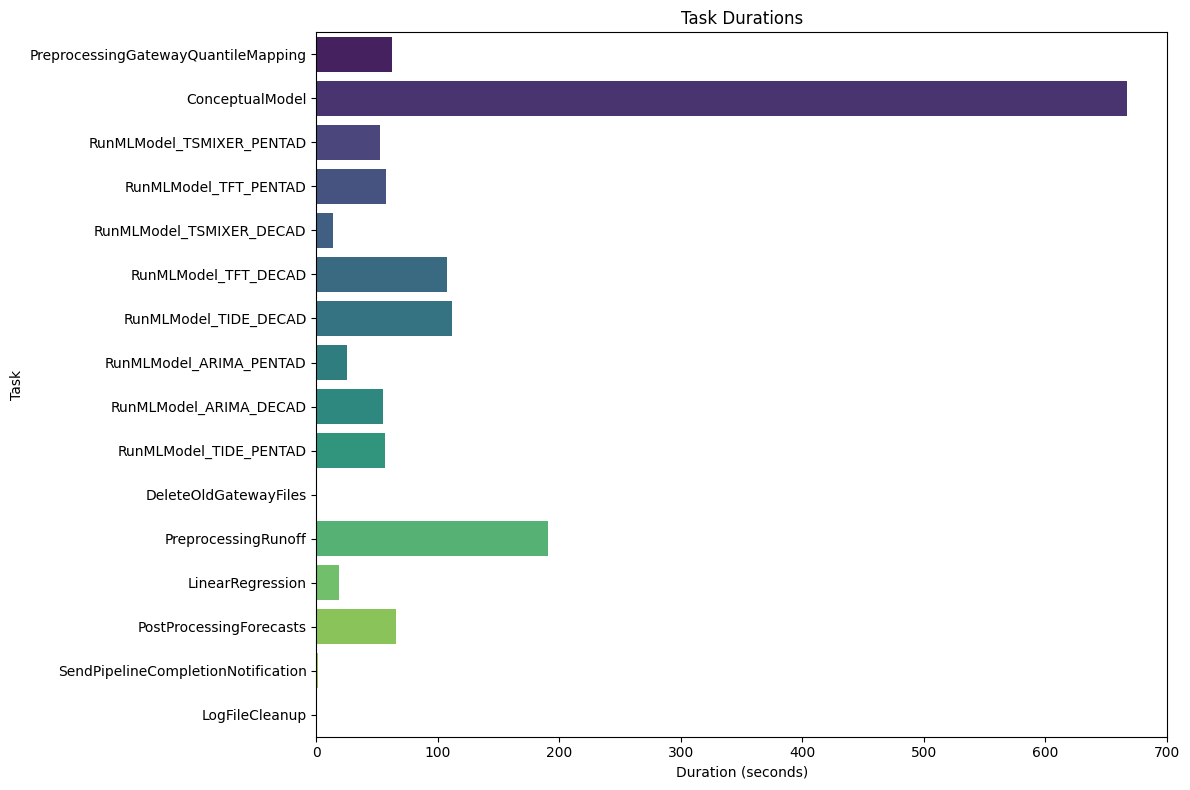

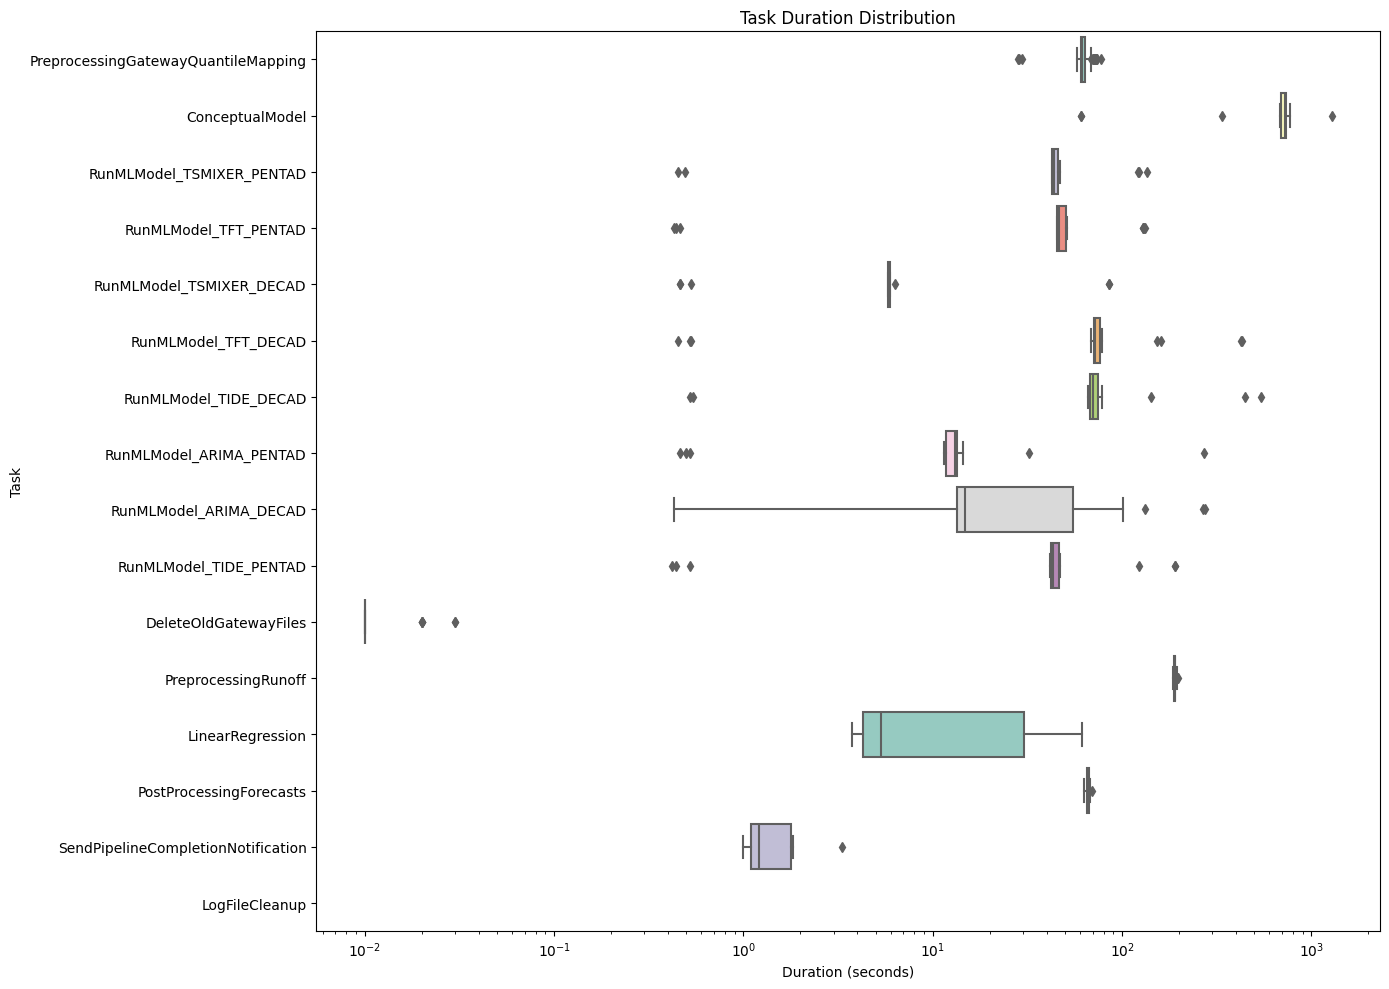

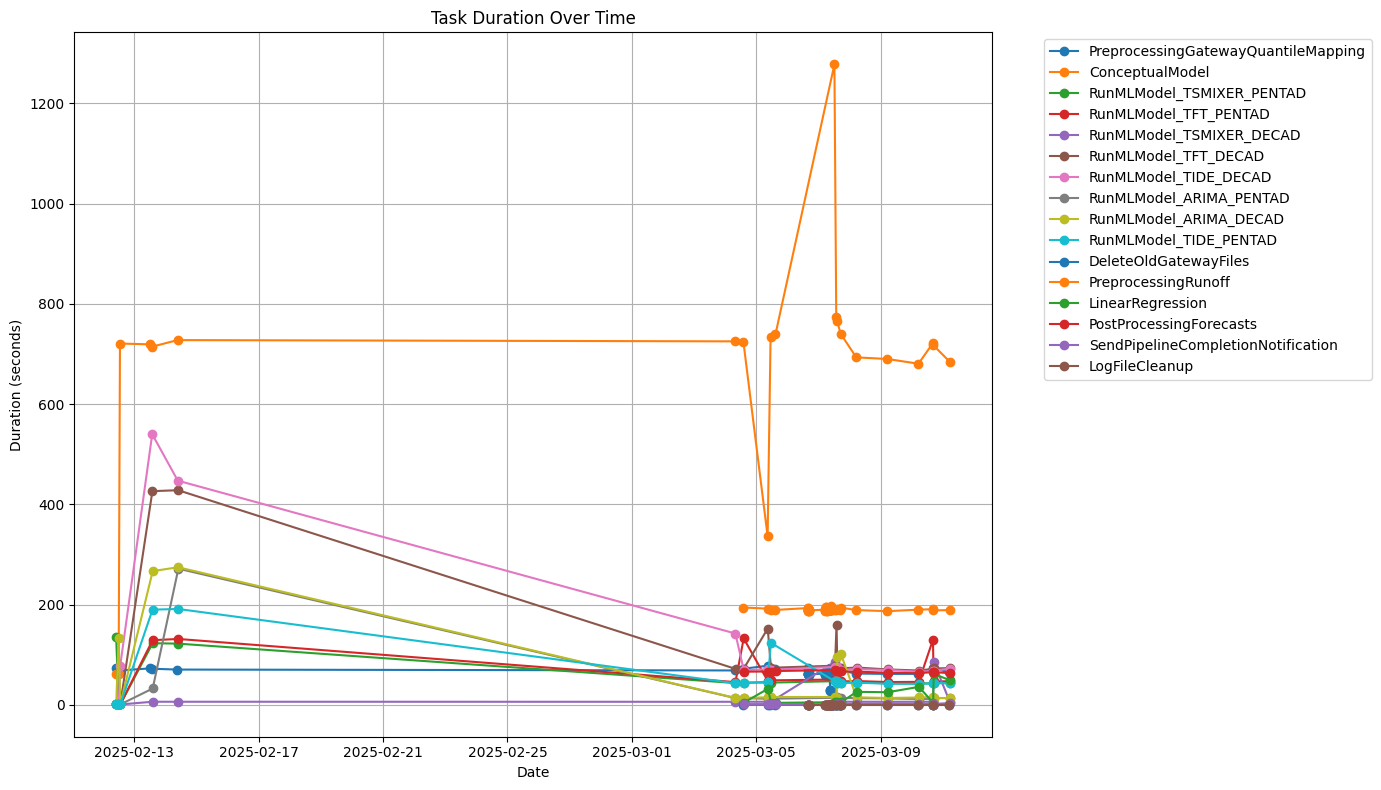


Total Pipeline Runs: 27
Pipeline Run 1: 2025-02-12 10:04:24.240141 to 2025-03-04 07:57:39.834905, Duration: 1720395.59 seconds (28673.26 minutes)
Pipeline Run 2: 2025-03-04 13:58:47.506774 to 2025-03-04 14:23:01.799605, Duration: 1454.29 seconds (24.24 minutes)
Pipeline Run 3: 2025-03-05 08:39:13.920624 to 2025-03-05 08:57:31.795384, Duration: 1097.87 seconds (18.30 minutes)
Pipeline Run 4: 2025-03-05 10:56:11.713380 to 2025-03-05 11:20:31.576345, Duration: 1459.86 seconds (24.33 minutes)
Pipeline Run 5: 2025-03-05 14:41:40.629730 to 2025-03-05 14:59:33.065561, Duration: 1072.44 seconds (17.87 minutes)
Pipeline Run 6: 2025-03-06 15:37:17.859771 to 2025-03-06 15:38:30.850878, Duration: 72.99 seconds (1.22 minutes)
Pipeline Run 7: 2025-03-06 15:44:47.628003 to 2025-03-06 16:32:26.346563, Duration: 2858.72 seconds (47.65 minutes)
Pipeline Run 8: 2025-03-06 16:32:26.354316 to 2025-03-06 16:49:08.982430, Duration: 1002.63 seconds (16.71 minutes)
Pipeline Run 9: 2025-03-07 05:02:18.018621 t

In [1]:
import pandas as pd
import re
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Function to parse the log file
def parse_timing_log(file_path):
    with open(file_path, 'r') as file:
        content = file.read()

    # Split by separator line
    entries = content.split('--------------------------------------------------')

    # Parse each entry
    data = []
    for entry in entries:
        if not entry.strip():
            continue

        task_match = re.search(r'Task: (.*?)$', entry, re.MULTILINE)
        start_match = re.search(r'Start Time: (.*?)$', entry, re.MULTILINE)
        end_match = re.search(r'End Time: (.*?)$', entry, re.MULTILINE)
        duration_match = re.search(r'Duration: (.*?) seconds', entry, re.MULTILINE)
        status_match = re.search(r'Status: (.*?)$', entry, re.MULTILINE)
        details_match = re.search(r'Details: (.*?)$', entry, re.MULTILINE)

        if all([task_match, start_match, end_match, duration_match, status_match]):
            task = task_match.group(1).strip()
            start_time = start_match.group(1).strip()
            end_time = end_match.group(1).strip()
            duration = float(duration_match.group(1).strip())
            status = status_match.group(1).strip()
            details = details_match.group(1).strip() if details_match else ''

            data.append({
                'Task': task,
                'Start Time': datetime.fromisoformat(start_time),
                'End Time': datetime.fromisoformat(end_time),
                'Duration': duration,
                'Status': status,
                'Details': details
            })

    return pd.DataFrame(data)

# Print directory of the current file
print(sys.path[0])

# Define path to file task_timings.log
file_path = sys.path[0] + '/../../../../sensitive_data_forecast_tools/intermediate_data/task_timings_ZH.log'

# Get absolute path
file_path = os.path.abspath(file_path)

# Print path for reference
print(file_path)

df = parse_timing_log(file_path)

# Display the data
print("Task Timing Summary:")
print(df[['Task', 'Duration', 'Status']].head())

# Generate statistics by task
task_stats = df.groupby('Task').agg({
    'Duration': ['min', 'max', 'mean', 'median', 'std', 'count']
}).reset_index()

task_stats.columns = ['Task', 'Min (s)', 'Max (s)', 'Mean (s)', 'Median (s)', 'Std (s)', 'Count']
print("\nTask Statistics:")
print(task_stats.sort_values('Mean (s)', ascending=False))

# Plot the mean duration by task
plt.figure(figsize=(12, 8))
sns.barplot(x='Duration', y='Task', data=df, ci=None, palette='viridis')
plt.title('Task Durations')
plt.xlabel('Duration (seconds)')
plt.tight_layout()

# Plot boxplot to see distribution
plt.figure(figsize=(14, 10))
sns.boxplot(x='Duration', y='Task', data=df, palette='Set3')
plt.title('Task Duration Distribution')
plt.xlabel('Duration (seconds)')
plt.xscale('log')  # Use log scale for better visualization
plt.tight_layout()

# Time series plot to see trends over time
plt.figure(figsize=(14, 8))
for task in df['Task'].unique():
    task_df = df[df['Task'] == task]
    plt.plot(task_df['Start Time'], task_df['Duration'], 'o-', label=task)

plt.title('Task Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Duration (seconds)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plots
plt.show()

# Calculate total pipeline duration
pipeline_runs = []
current_run = []
for i, row in df.sort_values('Start Time').iterrows():
    if row['Task'] == 'DeleteOldGatewayFiles' and current_run:
        # Start of a new pipeline run
        pipeline_runs.append(current_run)
        current_run = [row]
    else:
        current_run.append(row)

if current_run:
    pipeline_runs.append(current_run)

print(f"\nTotal Pipeline Runs: {len(pipeline_runs)}")
for i, run in enumerate(pipeline_runs):
    run_df = pd.DataFrame(run)
    start = run_df['Start Time'].min()
    end = run_df['End Time'].max()
    duration = (end - start).total_seconds()
    print(f"Pipeline Run {i+1}: {start} to {end}, Duration: {duration:.2f} seconds ({duration/60:.2f} minutes)")

